<a href="https://colab.research.google.com/github/alfredwisana/DPV/blob/main/Practical%201/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [29]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [30]:
df = pd.read_csv('diabetes.tab.csv')
# df = pd.read_csv("/content/drive/MyDrive/DPV/Practical 1/Practical 1/diabetes.tab.csv",delimiter=",")

In [31]:
df.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [33]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [34]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_range'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

In [35]:
bmi_bins = [0, 18.5, 25, 30, 35, 40, np.inf]  # Define bin edges for BMI categories
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']  # Define bin labels
df['bmi_cat'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [36]:
bp_bins = [0, 80, 90, 100, 110, 120, 130, np.inf]  # Define bin edges for BP categories
bp_labels = ['Very Low', 'Low', 'Normal', 'Elevated', 'High', 'Very High', 'Severe']  # Define bin labels
df['BP_category'] = pd.cut(df['BP'], bins=bp_bins, labels=bp_labels, right=False)

In [37]:
age_progression = df.groupby('age_range')['Y'].mean().reset_index()
age_progression.columns = ['Age Range', 'Mean Progression']
age_progression

C:\Users\Alfred\AppData\Local\Temp\ipykernel_33876\2550390838.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_progression = df.groupby('age_range')['Y'].mean().reset_index()


,Age Range,Mean Progression
0,20-29,125.121951
1,30-39,138.397260
2,40-49,139.649485
3,50-59,163.512000
4,60-69,171.877778
5,70-79,159.923077


In [38]:
age_progression['Age Range']

0    20-29
1    30-39
2    40-49
3    50-59
4    60-69
5    70-79
Name: Age Range, dtype: category
Categories (6, object): ['20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

C:\Users\Alfred\AppData\Local\Temp\ipykernel_33876\1704813213.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x='age_range', stat='count', element='bars', palette='coolwarm')


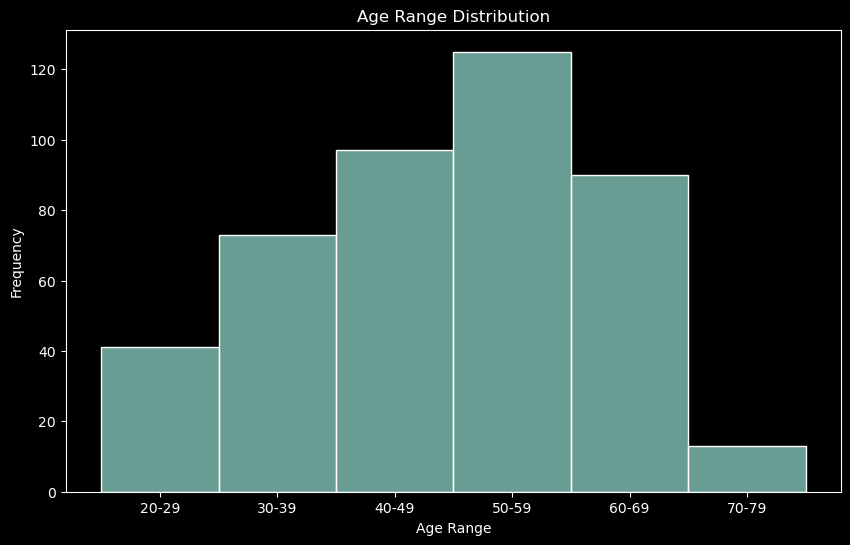

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df, x='age_range', stat='count', element='bars', palette='coolwarm')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()

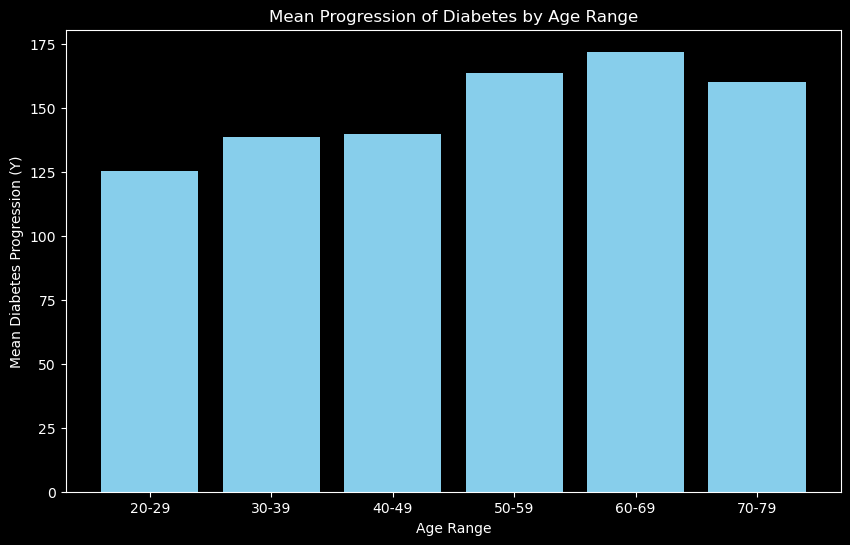

In [40]:
# Analyze the progression of diabetes by age range


# Plot the progression of diabetes by age range
plt.figure(figsize=(10, 6))
plt.bar(age_progression['Age Range'], age_progression['Mean Progression'], color='skyblue')
plt.title('Mean Progression of Diabetes by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Mean Diabetes Progression (Y)')
plt.show()

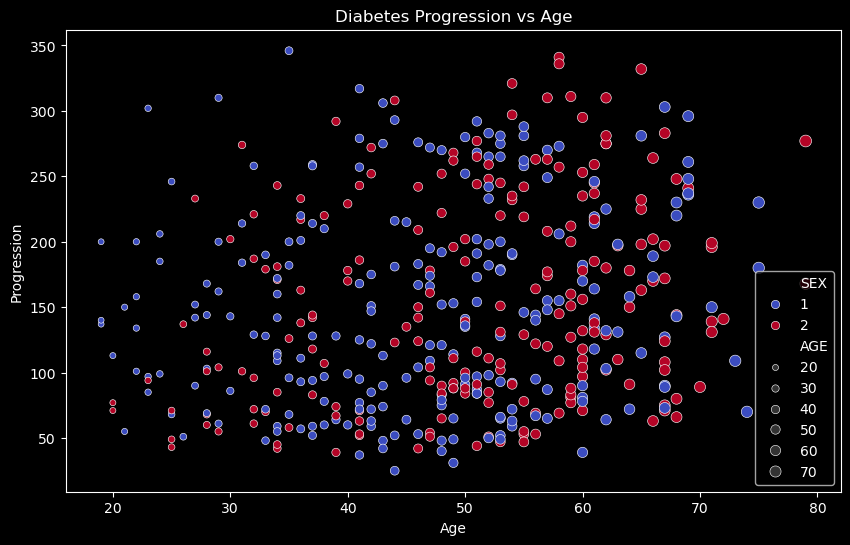

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='AGE', y='Y',size='AGE', hue='SEX', palette='coolwarm')  # Cari palette lain yang disediakan oleh matplotlib
plt.xlabel('Age')
plt.ylabel('Progression')
plt.title('Diabetes Progression vs Age')
plt.show()

In [42]:
# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on the correlation with the diabetes progression (Y)
correlation_with_Y = correlation_matrix['Y'].sort_values(ascending=False)

print(correlation_with_Y)


Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64


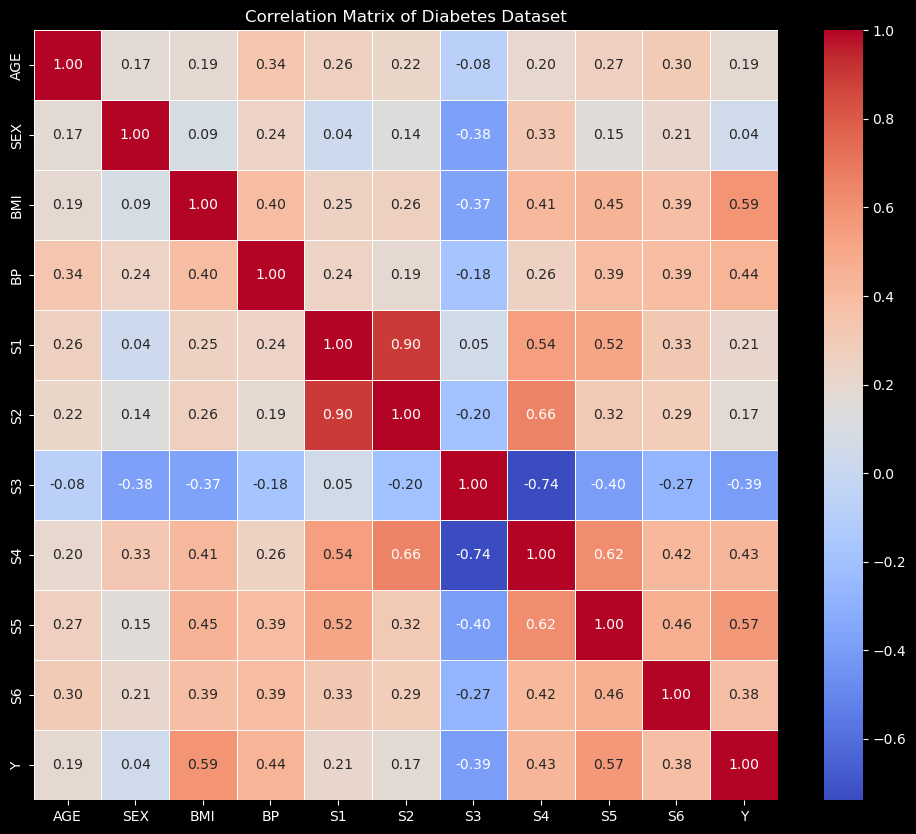

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
features = df[['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

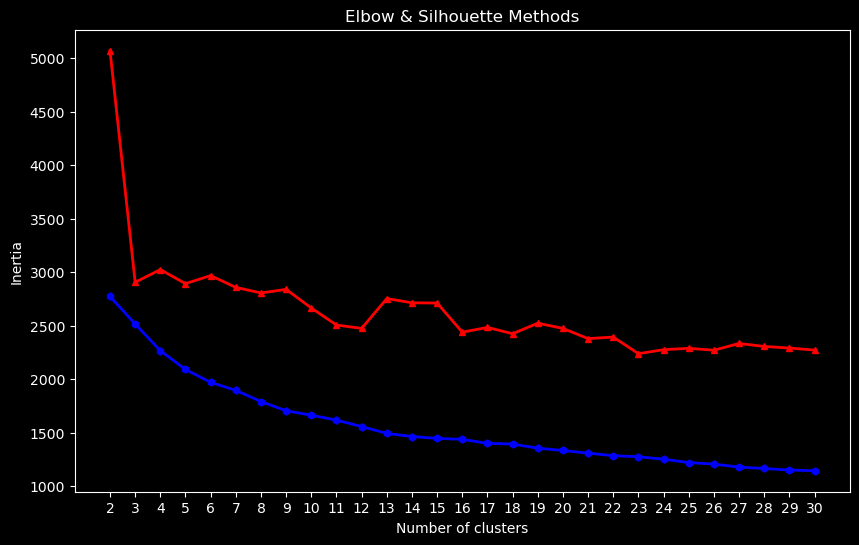

In [46]:
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using the elbow method
inertia = []
sscores = []

for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    labels = kmeans.predict(scaled_features)
    sscores.append(silhouette_score(scaled_features, labels) * 20000) #calculste distance from 1 cluster to another cluster
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(2,31), inertia, marker='h',markersize=5,linewidth=2,color='blue',linestyle='solid')  # .,ov^<>12348spP*h+xD|_
plt.plot(range(2,31), sscores, marker='^',markersize=5,linewidth=2,color='red',linestyle='solid')  # .,ov^<>12348spP*h+xD|_
plt.xticks(range(2, 31))
plt.title('Elbow & Silhouette Methods')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [47]:
# Perform K-means clustering with the chosen number of clusters
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)
labels = kmeans.fit_predict(scaled_features)



c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [48]:
# Group by clusters and calculate the mean of each feature
cluster_analysis = df.groupby('Cluster')

print(cluster_analysis)

# Additionally, let's look at the size of each cluster
cluster_sizes = df['Cluster'].value_counts()

print(cluster_sizes)


Cluster
0     49
2     46
9     46
10    43
3     38
11    33
7     32
4     30
8     29
5     26
1     25
6     24
12    21
Name: count, dtype: int64


In [49]:
clusters=[]
for i in range(0,n_clusters): clusters.append([])


In [50]:
i = 0
for label in labels:
    clusters[label].append(scaled_features)
    i=i+1

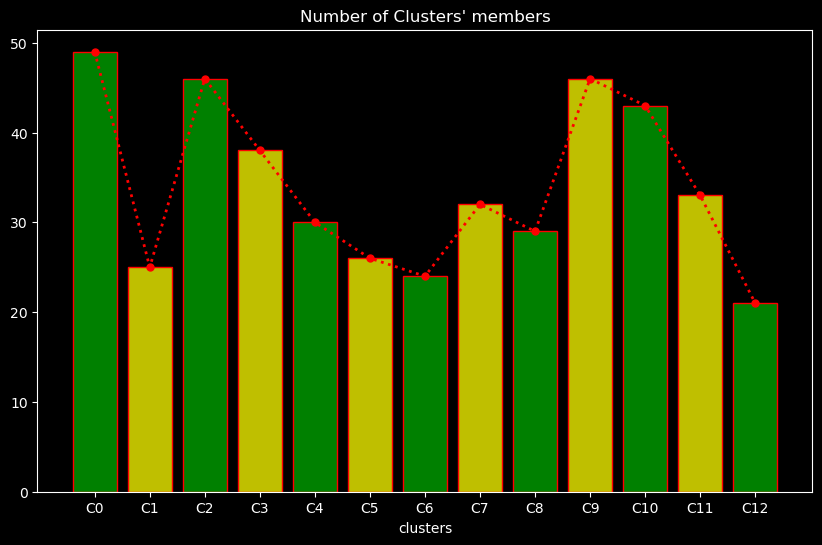

In [51]:
height = []
tick_labels = []
for i in range (0,n_clusters): 
    height.append(len(clusters[i]))
    tick_labels.append('C'+str(i))
    
plt.figure(figsize=(10,6))
plt.bar(range(0,n_clusters), height=height, tick_label=tick_labels,color=['g','y'],edgecolor='r')
plt.title('Number of Clusters\' members')
plt.xlabel('clusters')
plt.yticks(range(0, max(height)+10,10))
plt.plot(range(0,n_clusters), height, marker='o',markersize=5,linewidth=2,color='red',linestyle='dotted')
plt.show()

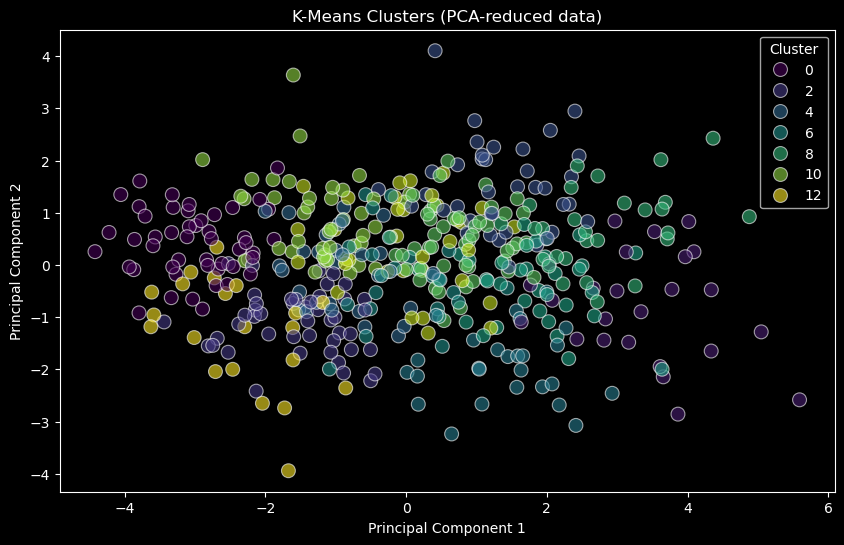

In [52]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Create a DataFrame for easy plotting
dataframe = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
dataframe['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('K-Means Clusters (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [53]:
df['age_range']

0      50-59
1      40-49
2      70-79
3      20-29
4      50-59
       ...  
437    60-69
438    40-49
439    60-69
440    30-39
441    30-39
Name: age_range, Length: 442, dtype: category
Categories (6, object): ['20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [54]:
selected_age_range = '50-59'
filtered_df = df[df['age_range'] == selected_age_range]
columns_to_show = ['bmi_cat', 'SEX','BMI','BP' ,'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'BP_category']
filtered_data = filtered_df[columns_to_show]

In [55]:
filtered_data.head(20)

,bmi_cat,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,BP_category
0,Obese I,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,Elevated
4,Normal,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,Elevated
11,Overweight,2,28.0,85.0,184,144.8,32.0,6.0,3.5835,77,Low
12,Normal,1,23.7,92.0,186,109.2,62.0,3.0,4.3041,81,Normal
13,Overweight,2,26.2,97.0,186,105.4,49.0,4.0,5.0626,88,Normal
32,Obese II,2,38.0,103.0,150,107.2,22.0,7.0,4.6444,98,Elevated
33,Normal,1,21.7,94.0,157,58.0,82.0,2.0,4.4427,92,Normal
34,Normal,1,20.5,78.0,147,84.2,52.0,3.0,3.9890,75,Very Low
36,Overweight,1,28.5,110.0,195,97.2,60.0,3.0,5.2417,85,High
40,Overweight,2,25.6,101.0,229,162.2,43.0,5.0,4.7791,114,Elevated


C:\Users\Alfred\AppData\Local\Temp\ipykernel_33876\3976469071.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filtered_data, x='bmi_cat', multiple='dodge', shrink=0.8,palette='coolwarm')


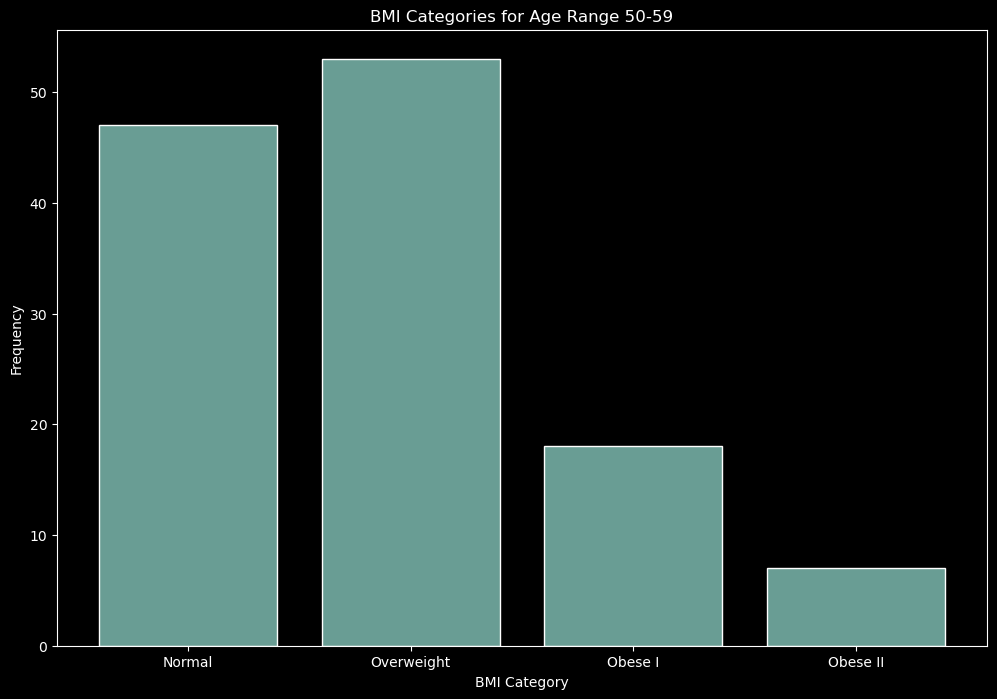

In [56]:
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x='bmi_cat', multiple='dodge', shrink=0.8,palette='coolwarm')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.title(f'BMI Categories for Age Range {selected_age_range}')
plt.show()

C:\Users\Alfred\AppData\Local\Temp\ipykernel_33876\1763755219.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filtered_data, x='bmi_cat', multiple='dodge', shrink=0.8,palette='coolwarm', ax=ax[0])


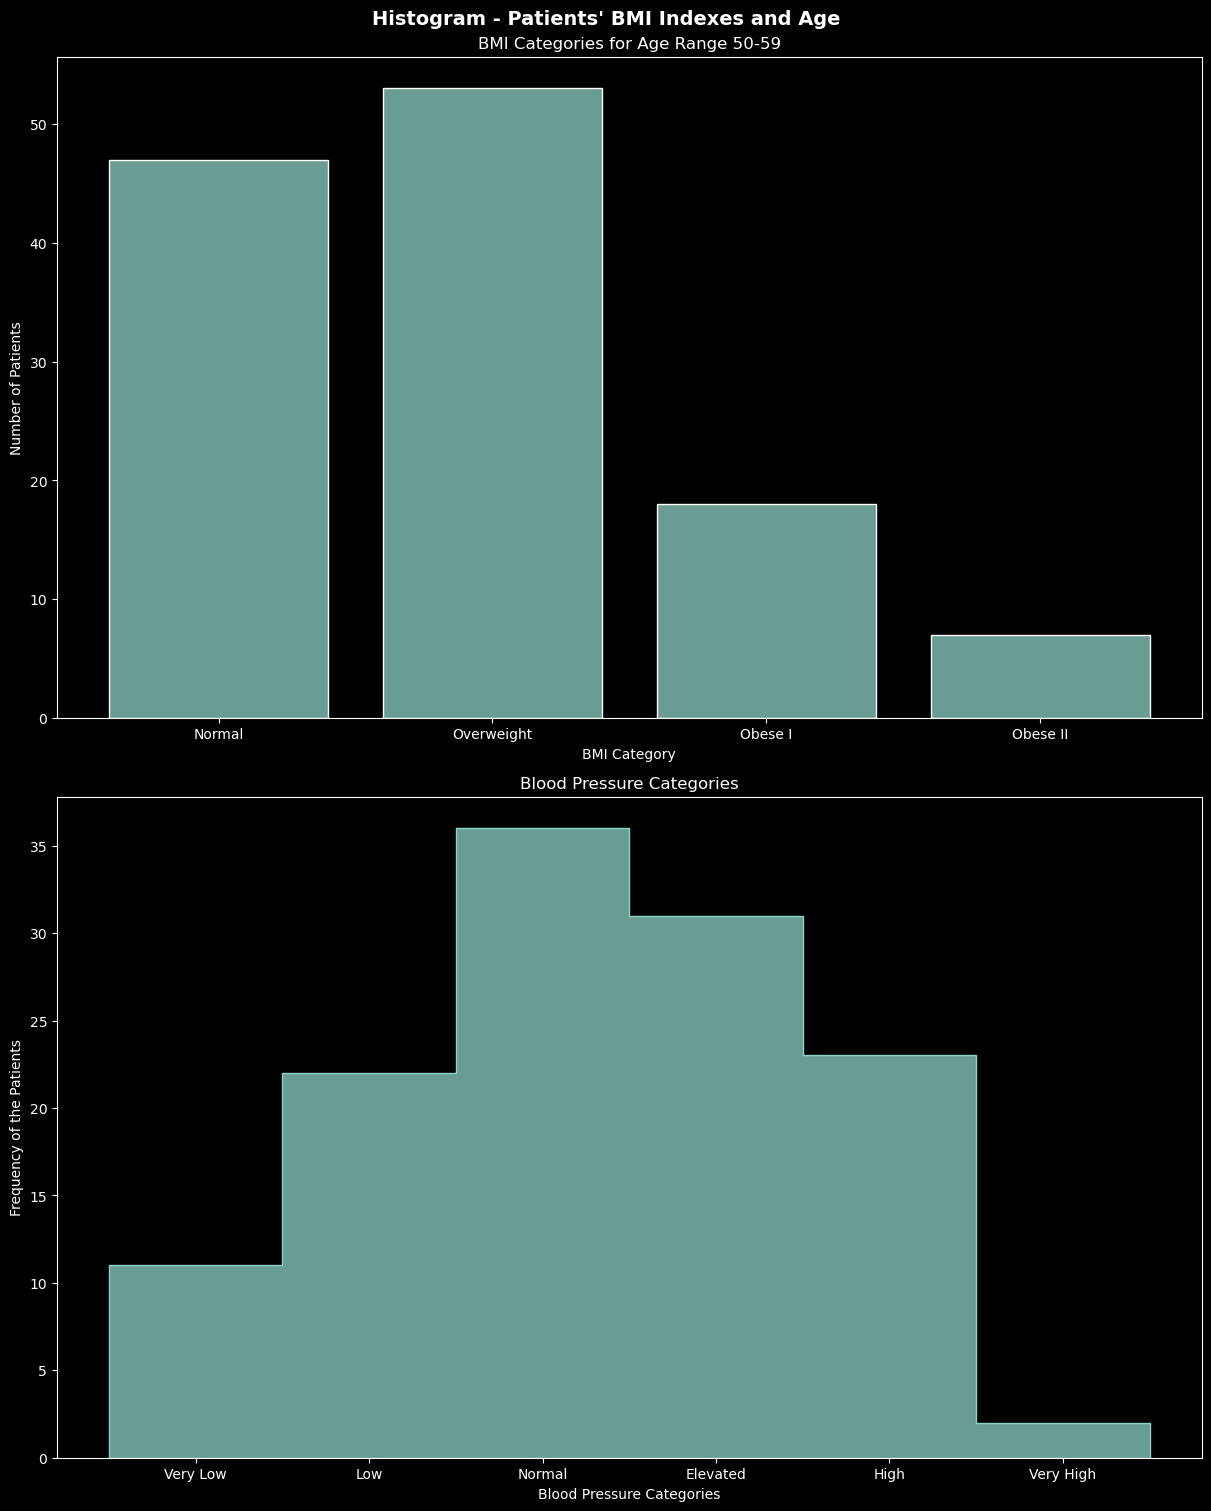

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, 
                       constrained_layout = True)  # dapat disingkat menjadi plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(12)
# menampilkan histogram utk BMI dengan lebar bin = 2, jumlah bins akan disesuaikan 
sns.histplot(data=filtered_data, x='bmi_cat', multiple='dodge', shrink=0.8,palette='coolwarm', ax=ax[0])
ax[0].set_title(f'BMI Categories for Age Range {selected_age_range}')
ax[0].set_xlabel('BMI Category')
ax[0].set_ylabel('Number of Patients')

# menampilkan histogram utk BMI dengan jumlah bin = 15, lebar bin akan disesuaikan
sns.histplot(filtered_data, x='BP_category', stat='frequency', element='step', ax=ax[1])
ax[1].set_title('Blood Pressure Categories')
ax[1].set_xlabel('Blood Pressure Categories')
ax[1].set_ylabel('Frequency of the Patients')


plt.suptitle('Histogram - Patients\' BMI Indexes and Age', fontsize=14, fontweight='bold')
plt.show()

In [58]:
set(df['bmi_cat'])

{'Normal', 'Obese I', 'Obese II', 'Obese III', 'Overweight', 'Underweight'}

In [59]:
print(bp_labels)
print(bp_bins)

['Very Low', 'Low', 'Normal', 'Elevated', 'High', 'Very High', 'Severe']
[0, 80, 90, 100, 110, 120, 130, inf]


In [60]:
from tabulate import tabulate
table = [['Age Category', 'Category Range']]
# for label, count in zip(bmi_labels, bmi_bins):
#     table.append([label, count+'-'])

for i in range(0,len(bp_labels)):
    table.append([bp_labels[i], str(bp_bins[i])+'-'+str(bp_bins[i+1])])

# Display the table using tabulate
print(tabulate(table, headers='firstrow', tablefmt='pretty'))

+--------------+----------------+
| Age Category | Category Range |
+--------------+----------------+
|   Very Low   |      0-80      |
|     Low      |     80-90      |
|    Normal    |     90-100     |
|   Elevated   |    100-110     |
|     High     |    110-120     |
|  Very High   |    120-130     |
|    Severe    |    130-inf     |
+--------------+----------------+


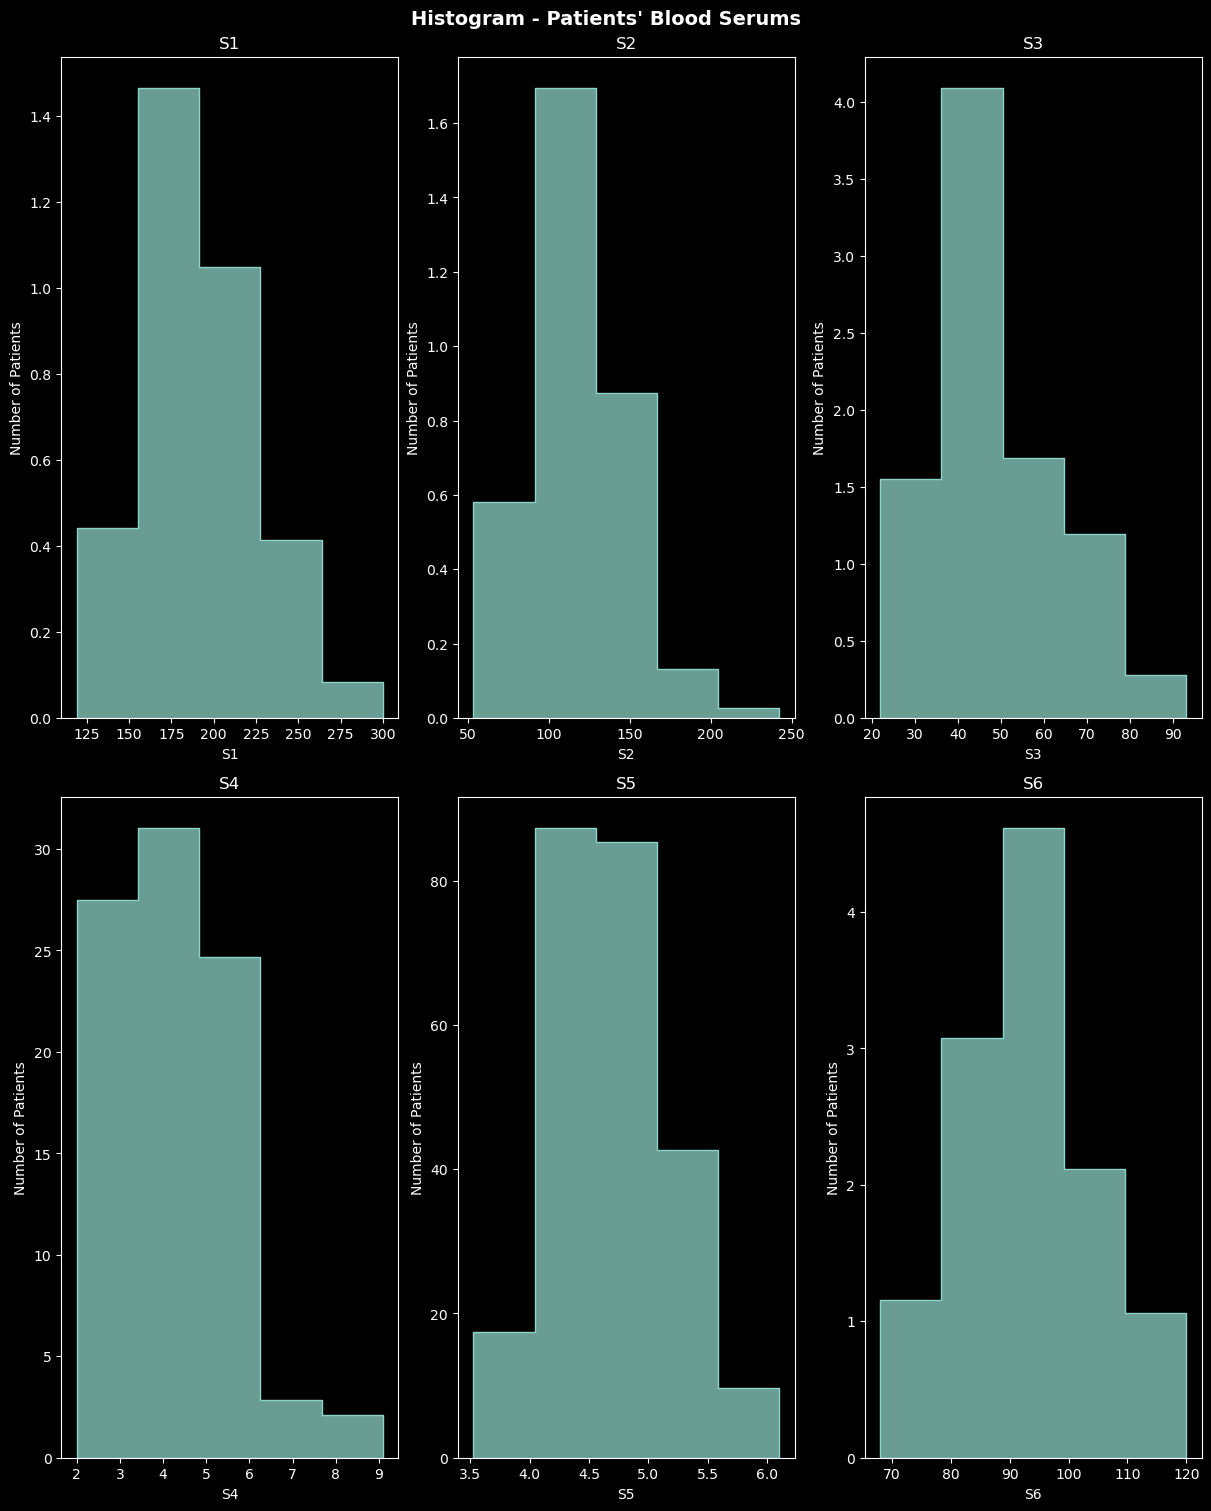

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, 
                       constrained_layout = True)  # dapat disingkat menjadi plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(12)

sns.histplot(filtered_data, x='S1', bins=5 ,stat='frequency', element='step', ax=ax[0,0])
ax[0,0].set_title('S1')
ax[0,0].set_xlabel('S1')
ax[0,0].set_ylabel('Number of Patients')

sns.histplot(filtered_data, x='S2', bins=5 ,stat='frequency', element='step', ax=ax[0,1])
ax[0,1].set_title('S2')
ax[0,1].set_xlabel('S2')
ax[0,1].set_ylabel('Number of Patients')

sns.histplot(filtered_data, x='S3', bins=5 ,stat='frequency', element='step', ax=ax[0,2])
ax[0,2].set_title('S3')
ax[0,2].set_xlabel('S3')
ax[0,2].set_ylabel('Number of Patients')

sns.histplot(filtered_data, x='S4', bins=5 ,stat='frequency', element='step', ax=ax[1,0])
ax[1,0].set_title('S4')
ax[1,0].set_xlabel('S4')
ax[1,0].set_ylabel('Number of Patients')

sns.histplot(filtered_data, x='S5', bins=5 ,stat='frequency', element='step', ax=ax[1,1])
ax[1,1].set_title('S5')
ax[1,1].set_xlabel('S5')
ax[1,1].set_ylabel('Number of Patients')

sns.histplot(filtered_data, x='S6', bins=5 ,stat='frequency', element='step', ax=ax[1,2])
ax[1,2].set_title('S6')
ax[1,2].set_xlabel('S6')
ax[1,2].set_ylabel('Number of Patients')


plt.suptitle('Histogram - Patients\' Blood Serums', fontsize=14, fontweight='bold')
plt.show()

[64 61]


Text(0.5, 1.0, 'Sex Proportion in Age Range 50-59')

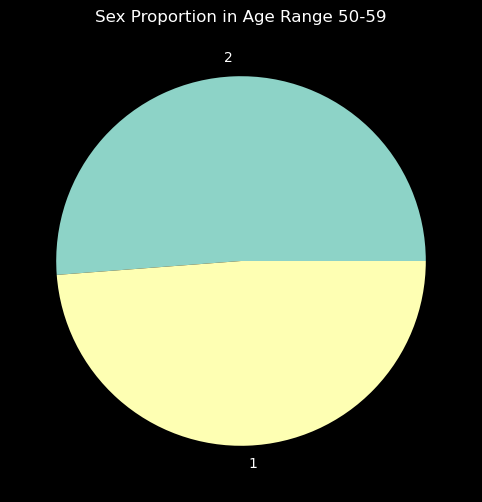

In [68]:
gender_count = filtered_data['SEX'].value_counts()
gender_label = gender_count.index
size = gender_count.values
print(size)
plt.figure(figsize=(10,6))
plt.pie(size,labels=gender_label)
plt.title('Sex Proportion in Age Range 50-59')